# Team 6 Project: MINJUSTICIA

In [1]:
import pandas as pd
import numpy as np
import calendar
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_rows = 7
import requests
import io
from datetime import datetime
import geopandas
import branca
import folium # package for making maps, please make sure to use a version older than 1.0.0.
from folium.plugins import TimeSliderChoropleth

Data

In [2]:
url="https://raw.githubusercontent.com/sagilar/ds4a-team6/master/retomintic/Data_UpdateJune13/reincidencia11junio2020_clean.csv"
df_mj = pd.read_csv(url,sep=",",encoding="utf-8")
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,ACTIVIDADES_ENSEÑANZA,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,12/05/11,30/12/09,...,NO,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,01/01/10,05/12/11,30/12/09,...,NO,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,01/01/10,06/08/13,30/12/09,...,NO,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,13/08/16,...,NO,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,11/06/20,NaN,09/06/20,...,NO,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,11/06/20,NaN,02/08/18,...,NO,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo


In [3]:
df_mj.columns

Index(['INTERNOEN', 'DELITO', 'TITULO_DELITO', 'SUBTITULO_DELITO', 'TENTATIVA',
       'AGRAVADO', 'CALIFICADO', 'FECHA_INGRESO', 'FECHA_SALIDA',
       'FECHA_CAPTURA', 'SITUACION_JURIDICA', 'ANO_NACIMIENTO', 'EDAD',
       'GENERO', 'ESTADO_CIVIL', 'PAIS_INTERNO', 'DEPARTAMENTO', 'CIUDAD',
       'REINCIDENTE', 'ESTADO_INGRESO', 'ACTIVIDADES_TRABAJO',
       'ACTIVIDADES_ESTUDIO', 'ACTIVIDADES_ENSEÑANZA', 'NIVEL_EDUCATIVO',
       'HIJOS_MENORES', 'CONDIC_EXPECIONAL', 'CODIGO_ESTABLECIMIENTO',
       'ESTABLECIMIENTO', 'DEPTO_ESTABLECIMIENTO', 'MPIO_ESTABLECIMIENTO',
       'REGIONAL', 'ESTADO'],
      dtype='object')

In [4]:
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])
df_mj["FECHA_INGRESO"] = pd.to_datetime(df_mj["FECHA_INGRESO"])
df_mj["FECHA_CAPTURA"] = pd.to_datetime(df_mj["FECHA_CAPTURA"])

df_mj["MES_INGRESO_INT"]=df_mj["FECHA_INGRESO"].dt.strftime('%m')
df_mj

,INTERNOEN,DELITO,TITULO_DELITO,SUBTITULO_DELITO,TENTATIVA,AGRAVADO,CALIFICADO,FECHA_INGRESO,FECHA_SALIDA,FECHA_CAPTURA,...,NIVEL_EDUCATIVO,HIJOS_MENORES,CONDIC_EXPECIONAL,CODIGO_ESTABLECIMIENTO,ESTABLECIMIENTO,DEPTO_ESTABLECIMIENTO,MPIO_ESTABLECIMIENTO,REGIONAL,ESTADO,MES_INGRESO_INT
0,5496C737C624136DB406CFC6744C684C070A3CD8,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,12/05/11,2009-12-30,...,CICLO III,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
1,1097561F306939C26DB4AC60377063DA7E2B079F,TRAFICO FABRICACION O PORTE DE ESTUPEFACIENTES,CONTRA LA SALUD PUBLICA,DE LAS AFECTACIONES A LA SALUD PUBLICA,N,N,N,2010-01-01,05/12/11,2009-12-30,...,CICLO I,SI,NaN,502,EPMSC MEDELLIN,ANTIOQUIA,MEDELLIN,NOROESTE,Baja,01
2,CB7033A707ADE673139F8A17CAD26AD54696C135,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2010-01-01,06/08/13,2009-12-30,...,CICLO I,SI,NaN,235,EPAMSCAS POPAYAN (ERE),CAUCA,POPAYAN,OCCIDENTE,Baja,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142896,856368363834654A5F64534163FE7C7EE6A8A1CA,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2016-08-13,...,CICLO I,NO,CON DISCAPACIDAD,613,EPMSC ARMENIA,QUINDIO,ARMENIA,VIEJO CALDAS,Activo,11
142897,E5385D722533896751FBF38A2129D97966267AB1,HURTO,CONTRA EL PATRIMONIO ECONOMICO,DE LA ESTAFA,S,N,N,2020-11-06,NaN,2020-09-06,...,CICLO I,SI,AFRO COLOMBIANO,5373,COMPLEJO CARCELARIO Y PENITENCIARIO DE MEDELLI...,ANTIOQUIA,MEDELLIN,NOROESTE,Activo,11
142898,FA176CD9955DAF77F313343E29136E87FE8B0056,FABRICACION TRAFICO Y PORTE DE ARMAS DE FUEGO ...,CONTRA LA SEGURIDAD PUBLICA,DE LOS DELITOS DE PELIGRO COMUN O QUE PUEDEN O...,N,N,N,2020-11-06,NaN,2018-02-08,...,CICLO IV,SI,NaN,204,EPMSC EL BORDO,CAUCA,EL BORDO,OCCIDENTE,Activo,11


individuals

In [5]:
individuals = df_mj["INTERNOEN"].unique()
print("length of complete df: " + str(df_mj["INTERNOEN"].count()))
print("length of unique individuals: "+ str(len(individuals)))


length of complete df: 142899
length of unique individuals: 78841


In [6]:
print("number of occurrences by individual")
occurrences = df_mj["INTERNOEN"].value_counts()
occurrences

number of occurrences by individual


71D8863489582B956956B3E244CF97F629E190F8    16
85F84CC906246E467ACC8D3CD73B576E0B264556    15
5F6A19F239D3786924DB4FEAC108F33219BFD205    14
                                            ..
7B996D955E0CFE2F5B7E6B22BCA4356C8151CF4C     1
7E5BF31B71250B6D1D0AB11AEFAF72570338954B     1
F16094C0389B1FC6E72B3894A7B654715B32604A     1
Name: INTERNOEN, Length: 78841, dtype: int64

In [7]:
for item in occurrences.index:
    print("crimes of individual " + str(item) + ": ")
    crime_list_per_ind = df_mj["DELITO"].where(df_mj["INTERNOEN"]==item)
    for crime in crime_list_per_ind.dropna():
        print(crime + ", ", end="")
    #breaking to check just first ind
    break

crimes of individual 71D8863489582B956956B3E244CF97F629E190F8: 
CONCIERTO PARA DELINQUIR, CONCIERTO PARA DELINQUIR, CONSTREÑIMIENTO ILEGAL, DESPLAZAMIENTO FORZADO, DESPLAZAMIENTO FORZADO, DESTRUCCION Y APROPIACION DE BIENES PROTEGIDOS, FABRICACION  TRAFICO Y PORTE DE ARMAS Y MUNICIONES DE USO PRIVATIVO DE LAS FUERZAS ARMADAS, HOMICIDIO, HOMICIDIO, HOMICIDIO EN PERSONA PROTEGIDA, HURTO, HURTO, RECLUTAMIENTO ILICITO, SECUESTRO SIMPLE, TORTURA EN PERSONA PROTEGIDA, UTILIZACION ILEGAL DE UNIFORMES E INSIGNIAS, 

Ubicación geográfica

In [8]:
dept_count = df_mj["DEPTO_ESTABLECIMIENTO"].value_counts()
dept_count.index

Index(['BOGOTA D.C.', 'ANTIOQUIA', 'VALLE DEL CAUCA', 'SANTANDER', 'META',
       'BOYACA', 'TOLIMA', 'CUNDINAMARCA', 'CALDAS', 'HUILA', 'CAUCA',
       'NORTE DE SANTANDER', 'NARIÑO', 'RISARALDA', 'CORDOBA', 'QUINDIO',
       'ATLANTICO', 'CAQUETA', 'CESAR', 'BOLIVAR', 'CASANARE', 'SUCRE',
       'MAGDALENA', 'CHOCO', 'ARAUCA', 'LA GUAJIRA', 'PUTUMAYO', 'AMAZONAS',
       'SAN ANDRES Y PROVIDENCIA'],
      dtype='object')

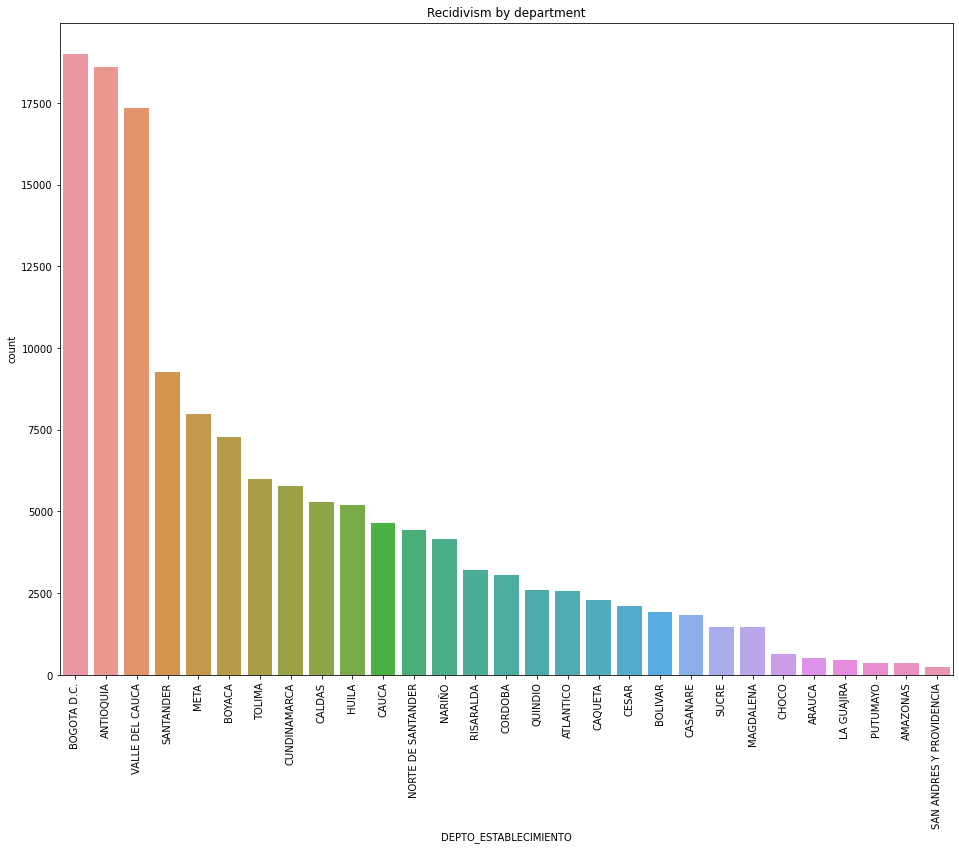

In [11]:
df_dept_count = dept_count.reset_index()
df_dept_count.columns = ["DEPTO_ESTABLECIMIENTO","count"]
df_dept_count
fig = plt.figure(figsize=(16,12))
plt.title("Recidivism by department")
plt.xticks(rotation=90)
dept_bc = sns.barplot(x="DEPTO_ESTABLECIMIENTO", y="count", data=df_dept_count)


In [9]:
#Colombia.geo.json
colombia_geojson = geopandas.read_file("Colombia.geo.json", driver = "GeoJSON")
colombia_geojson["NOMBRE_DPT"].unique()

array(['ANTIOQUIA', 'ATLANTICO', 'SANTAFE DE BOGOTA D.C', 'BOLIVAR',
       'BOYACA', 'CALDAS', 'CAQUETA', 'CAUCA', 'CESAR', 'CORDOBA',
       'CUNDINAMARCA', 'CHOCO', 'HUILA', 'LA GUAJIRA', 'MAGDALENA',
       'META', 'NARIÑO', 'NORTE DE SANTANDER', 'QUINDIO', 'RISARALDA',
       'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'ARAUCA',
       'CASANARE', 'PUTUMAYO', 'AMAZONAS', 'GUAINIA', 'GUAVIARE',
       'VAUPES', 'VICHADA',
       'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA'],
      dtype=object)

In [12]:
dept_count
colombia_geojson_mod = colombia_geojson.copy()
colombia_geojson_mod["NOMBRE_DPT"][colombia_geojson_mod["NOMBRE_DPT"]=="SANTAFE DE BOGOTA D.C"]="BOGOTA D.C."
colombia_geojson_mod["NOMBRE_DPT"][colombia_geojson_mod["NOMBRE_DPT"]=="ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA"]="SAN ANDRES Y PROVIDENCIA"
dept_data = colombia_geojson_mod.join(df_dept_count.set_index("DEPTO_ESTABLECIMIENTO"),on="NOMBRE_DPT")
dept_data.fillna(0, inplace = True)
dept_data

/home/santiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/santiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry,count
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6.335186e+06,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640...",18591.0
1,08,ATLANTICO,3.360765e+09,240936.172,3.360765e+05,"POLYGON ((-74.87060 10.36120, -74.87640 10.343...",2564.0
2,11,BOGOTA D.C.,1.650948e+09,323322.540,1.650948e+05,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360...",19008.0
...,...,...,...,...,...,...,...
30,97,VAUPES,5.308784e+10,1666564.449,5.308784e+06,"POLYGON ((-70.11300 1.98530, -70.11470 1.97610...",0.0
31,99,VICHADA,1.000553e+11,1781121.957,1.000553e+07,"POLYGON ((-67.79690 6.27950, -67.76810 6.27190...",0.0
32,88,SAN ANDRES Y PROVIDENCIA,4.960252e+07,71946.251,4.960252e+03,"MULTIPOLYGON (((-81.71296 12.59456, -81.71284 ...",252.0


In [69]:
# color scheme
min_cn, max_cn = df_dept_count['count'].quantile([0.01,0.99]).apply(round, 2)

colormap = branca.colormap.LinearColormap(
    colors=['blue','green','orange','red','darkred'],
    #index=df_dept_count['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=min_cn,
    vmax=max_cn
)

colormap.caption="Total recivism in Colombia"

In [70]:
# interactive visualization for recidivism rate by department

m_recidivism = folium.Map(location=[4.12, -73.22],
                        zoom_start=5,
                        tiles="OpenStreetMap")
style_function = lambda x: {
    'fillColor': colormap(x['properties']['count']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}

stategeo = folium.GeoJson(
    dept_data.to_json(),
    name='Colombian crime recividism',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['NOMBRE_DPT', 'count'],
        aliases=['DEPARTMENT', 'Total recidivism'], 
        localize=True
    )
).add_to(m_recidivism)

colormap.add_to(m_recidivism)
m_recidivism